# 1. Problem 

Bessie the cow has enrolled in a computer science PhD program, driven by her love of computer science and also the allure of one day becoming "Dr. Bessie". Having worked for some time on her academic research, she has now published N papers (1≤N≤105), and her i-th paper has accumulated ci citations (0≤ci≤105) from other papers in the research literature.
Bessie has heard that an academic's success can be measured by their h-index. The h-index is the largest number h such that the researcher has at least h papers each with at least h citations. For example, a researcher with 4 papers and respective citation counts (1,100,2,3) has an h-index of 2, whereas if the citation counts were (1,100,3,3) then the h-index would be 3.

To up her h-index, Bessie is planning to write a survey article citing several of her past papers. Due to page limits, she can include at most L citations in this survey (0≤L≤105), and of course she can cite each of her papers at most once.

Help Bessie determine the maximum h-index she may achieve after writing this survey.

Note that Bessie's research advisor should probably inform her at some point that writing a survey solely to increase one's h index is ethically dubious; other academics are not recommended to follow Bessie's example here.

#### INPUT FORMAT (input arrives from the terminal / stdin):
The first line of input contains N and L.<br>
<br>The second line contains N space-separated integers c1,…,cN.

#### OUTPUT FORMAT (print output to the terminal / stdout):
The maximum h-index Bessie may achieve after writing the survey.
###### SAMPLE INPUT:
4 0
<br>1 100 2 3
##### SAMPLE OUTPUT:
2
Bessie cannot cite any of her past papers. As mentioned above, the h-index for (1,100,2,3) is 2.

##### SAMPLE INPUT:
4 1
<br>1 100 2 3
##### SAMPLE OUTPUT:
3
<br>If Bessie cites her third paper, then the citation counts become (1,100,3,3). As mentioned above, the h-index for these counts is 3.

In [1]:
from bisect import bisect_right

In [2]:
[m,l] = list(map(int,input().strip().split()))
c = list(map(int,input().strip().split()))
c.sort()

def check(h):
    a = c[len(c)-h]
    if a>=h:
        return True
    if a==h-1:
        r = bisect_right(c,h-1)-1
        return r - len(c)-h +1<=1
    return False

left = 0
right = len(c)+1
while left+1<right:
    h = (left+right)//2
    if check(h):
        left = h
    else:
        right = h
        
print(left)

4 0 
1 100 2 3
3


# 2.Problem

Bessie is applying to computer science graduate school, and has secured an interview at a prestigious computer science lab. However, to avoid offending anyone, Bessie is interested in determining the relative seniority of the N current members of the lab (1≤N≤100). No two members of the lab have the same seniority, but determining their seniorities may be tricky. To do so, Bessie will look at the lab's publications.
Each publication contains an author list, which is an ordering of all N lab members. The list is in decreasing order of the effort each lab member contributed to the paper. If multiple researchers put in equivalent effort, then they are ordered alphabetically. Since more senior lab members have additional administrative duties, a a more senior researcher never puts in more effort than a more junior researcher.

For example, in a lab consisting of a junior student Elsie, a more senior Prof. Mildred, and a very senior Prof. Dean, then there may be a paper (Elsie-Mildred-Dean) if all of them put in different amounts of effort (i.e. Elsie puts in more effort than Mildred, and Mildred more than Dean). However, they may also have a paper in the order (Elsie-Dean-Mildred) if Mildred and Dean put in the same amount of effort and Elsie puts in more effort.

Given K publications from this lab (1≤K≤100), help Bessie determine for all pairs of researchers in this lab who is more senior, if it's possible to tell.

## INPUT FORMAT (input arrives from the terminal / stdin):
The first line contains two integers, K and N.
The second line contains N space-separated strings, giving the names of the members of the lab. Each consists of lowercase letters and is at most 10 characters long.

Each of the next K lines contains N space-separated strings, indicating the author list for one publication.

## OUTPUT FORMAT (print output to the terminal / stdout):
The output should consist of N lines, with N characters per line. On line i, for any j≠i, character j should be 1 if the ith member is definitely more senior than the jth member, 0 if the ith member is definitely more junior than the jth member, and ? if it's impossible to tell from the given publications.
Character i on line i should be B because that's Bessie's favorite letter.

### SAMPLE INPUT:
1 3
dean elsie mildred
elsie mildred dean
## SAMPLE OUTPUT:
B11
0B?
0?B
In this first example, the single paper (elsie-mildred-dean) does not give enough information to determine whether Elsie is more senior than Mildred or vice versa. However, one can deduce that Dean must be more senior than both, so the seniority orderings Elsie<Mildred<Dean and Mildred<Elsie<Dean are both possible.

#### SAMPLE INPUT:
2 3
elsie mildred dean
elsie mildred dean
elsie dean mildred
SAMPLE OUTPUT:
B00<br>
1B0<br>
11B

In [10]:

[k, n] = list(map(int, input().strip().split()))
cows = input().strip().split()
cowind = {}
s = [["?"]*n for i in range(n)]
for i in range(n):
  cowind[cows[i]] = i
  s[i][i] = "B"
for i in range(k):
  order = input().strip().split()
  group = 0
  g = [0] * n
  for i in range(1, n):
    if order[i] < order[i-1]:
      group += 1
    g[i] = group
  for j in range(n):
    for k in range(j+1, n):
      if g[j] < g[k]:
        ind1 = cowind[order[j]]
        ind2 = cowind[order[k]]
        s[ind2][ind1] = "1"
        s[ind1][ind2] = "0"
for row in s:
    print("".join(row))

2 3
elsie mildred dean
elsie mildred dean
elsie dean mildred
B00
1B0
11B


# 3.Problem

Farmer John's pasture can be regarded as a large 2D grid of square "cells" (picture a huge chess board). Each cell is labeled with:

C if the cell contains a cow.
G if the cell contains grass.
. if the cell contains neither a cow nor grass.
For two distinct cows to become friends, the cows must choose to meet at a grass-covered square that is directly horizontally or vertically adjacent to both of them. During the process, they eat the grass in the grass-covered square, so future pairs of cows cannot use that square as a meeting point. The same cow may become friends with more than one other cow, but no pair of cows may meet and become friends more than once.

Farmer John is hoping that numerous pairs of cows will meet and become friends over time. Please determine the maximum number of new friendships between distinct pairs of cows that can possibly be created by the end of this experience.

### INPUT FORMAT (input arrives from the terminal / stdin):
The first line contains N and M (N,M≤1000).
The next N lines each contain a string of M characters, describing the pasture.

### OUTPUT FORMAT (print output to the terminal / stdout):
Count the maximum number of pairs of cows that can become friends by the end of the experience.
#### SAMPLE INPUT:
4 5<br>
.CGGC<br>
.CGCG<br>
CGCG.<br>
.CC.C<br>
#### SAMPLE OUTPUT:
4<br>
If we label the cow in row i and column j with coordinates (i,j), then in this example there are cows at (1,2), (1,5), (2,2), (2,4), (3,1), (3,3), (4,2), (4,3), and (4,5). One way for four pairs of cows to become friends is as follows:

The cows at (2,2) and (3,3) eat the grass at (3,2).<br>
The cows at (2,2) and (2,4) eat the grass at (2,3).<br>
The cows at (2,4) and (3,3) eat the grass at (3,4).<br>
The cows at (2,4) and (1,5) eat the grass at (2,5).

In [12]:
[n, m] = list(map(int, input().strip().split()))
arr = ["" for i in range(n)]
cows = set()
final = set()
adj = [(1, 0), (0, 1), (-1, 0), (0, -1)]
for i in range(n):
  arr[i] = input().strip()

for i in range(n):
  for j in range(m):
    if arr[i][j] != "G":
      continue
    cs = []
    for p in adj:
      nextn = i + p[0]
      nextm = j + p[1]
      if 0 <= nextn < n and 0 <= nextm < m:
        if arr[nextn][nextm] == "C":
          cs.append((nextn, nextm))
    cs.sort()
    if len(cs) > 2:
      final.add((i, j))
    elif len(cs) == 2:
      if (cs[0], cs[1]) not in cows:
        cows.add((cs[0], cs[1]))
        final.add((i, j))
    # for k in range(len(cs)):
    #   for l in range(k+1, len(cs)):
    #     tup = (cs[k], cs[l])
    #     if tup not in tups:
    #       tups[tup] = []
    #     tups[tup].append((i, j))

print(len(final))

4 5
.CGGC
.CGCG
CGCG.
.CC.C
4


# 4. Problem 

Farmer John's cows have been holding a daily online gathering on the "mooZ" video meeting platform. For fun, they have invented a simple number game to play during the meeting to keep themselves entertained.
Elsie has three positive integers A, B, and C (A≤B≤C). These integers are supposed to be secret, so she will not directly reveal them to her sister Bessie. Instead, she gives Bessie seven (not necessarily distinct) integers in the range 1…109, claiming that they are A, B, C, A+B, B+C, C+A, and A+B+C in some order.

Given a list of these seven numbers, please help Bessie determine A, B, and C. It can be shown that the answer is unique.

### INPUT FORMAT (input arrives from the terminal / stdin):
The only line of input consists of seven space-separated integers.
### OUTPUT FORMAT (print output to the terminal / stdout):
Print A, B, and C separated by spaces.
#### SAMPLE INPUT:
2 2 11 4 9 7 9
#### SAMPLE OUTPUT:
2 2 7


In [3]:
from IPython.display import Image

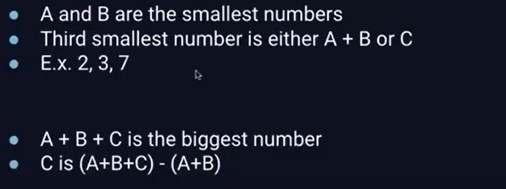

In [4]:
Image('usacon.png')

In [2]:
numbers = list(map(int,input().split()))
numbers.sort()

a= numbers[0]
b= numbers[1]
c = numbers[-1] - (a+b)
print(a,b,c)

2 2 11 4 9 7 0
0 2 9


# Which Algorithm will work for you ?


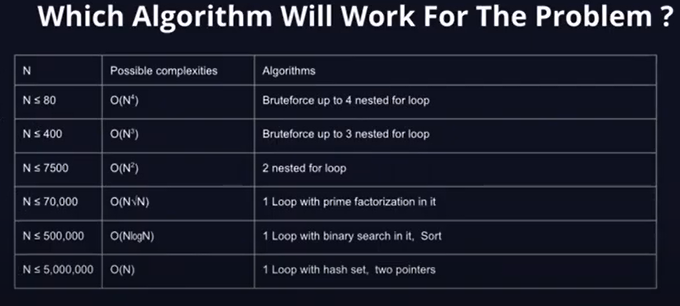

In [5]:
Image('algo.png')

# What Should Learn for USACO Bronze?

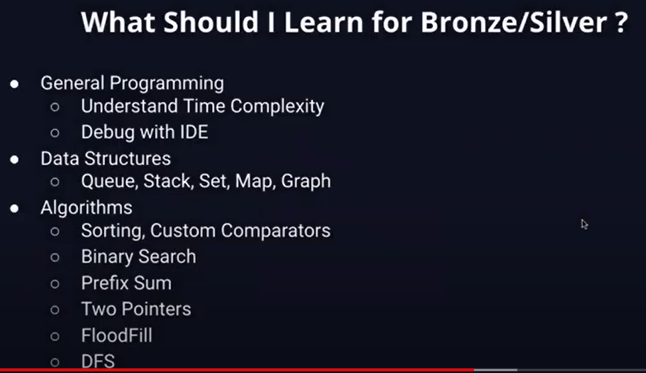

In [6]:
Image('bronze.png')

# 5.Problem 

A little known fact about cows is that they have their own version of the alphabet, the "cowphabet". It consists of the 26 letters 'a' through 'z', but when a cow speaks the cowphabet, she lists these letters in a specific ordering that might be different from the order 'abcdefghijklmnopqrstuvwxyz' we are used to hearing.
To pass the time, Bessie's cousin Mildred has been humming the cowphabet over and over again, and Farmer Nhoj is curious how many times she's hummed it.

Given a lowercase string of letters that Farmer Nhoj has heard Mildred say, compute the minimum number of times Mildred must have hummed the entire cowphabet in order for Farmer Nhoj to have heard the given string. Farmer Nhoj isn't always paying attention to what Mildred hums, and so he might have missed some of the letters that Mildred has hummed. The string you are told consists of just the letters that he remembers hearing.

Note: the time limit per test case on this problem is twice the default.

### INPUT FORMAT (input arrives from the terminal / stdin):
The only line of input contains the string of lowercase letters that Farmer Nhoj heard Mildred say. This string has length at least 1 and at most 105.
### OUTPUT FORMAT (print output to the terminal / stdout):
Print the minimum number of times Mildred must have hummed the entire cowphabet.
#### SAMPLE INPUT:
abcdefghijklmnopqrstuvwxyz <br>
mood
#### SAMPLE OUTPUT:
3

In [10]:
alphabet = input()
s = input()

reverse = {}
for i in range(len(alphabet)):
    reverse[alphabet[i]] = i
    
cur = -1
count = 1
for c in s:
    if reverse[c] <=cur:
        count +=1
    cur = reverse[c]
    
print(count)

abcdefghijklmnopqrstuvwxyz
mood
3


# 6.Problem 

Farmer John is yet again trying to take a photograph of his N cows (2≤N≤1000).
Each cow has an integer "breed ID" number in the range 1…100. Farmer John has a very peculiar idea in mind for his photo: he wants to partition all the cows into disjoint groups (in other words, place each cow in exactly one group) and then line up the groups so the sum of the breed IDs of the cows in the first group is even, the sum of the IDs in the second group is odd, and so on, alternating between even and odd.

What is the maximum possible number of groups Farmer John can form?

### INPUT FORMAT (input arrives from the terminal / stdin):
The first line of input contains N. The next line contains N space-separated integers giving the breed IDs of the N cows.
### OUTPUT FORMAT (print output to the terminal / stdout):
The maximum possible number of groups in Farmer John's photo. It can be shown that at least one feasible grouping exists.
#### SAMPLE INPUT:
7<br>
1 3 5 7 9 11 13
#### SAMPLE OUTPUT:
3


Hint: He wants to group two separate distinct groups 
1. Put down the even cows in even groups
2. Then find out how many odd groups you can make (vice versa)
3. Start with odd like 5 then 4 then 5 then 4 if you don't have even then put 2 odds and if you don't have odd you can't go further 

In [12]:
m = int(input())
nums = map(int,input().strip().split(" "))
evens = 0
odds = 0

for i in nums:
    if i%2 ==0:
        evens +=1
    else:
        odds +=1
        
        
        
i = 0
while odds>0:
    i+=1
    if i%2 ==1:
        if evens>0:
            evens -=1
            continue 
        if odds >0:
            odds -=2
            continue 
        i-=2
        break
    else:
        odds -=1
print(i)

7
1 3 5 7 9 11 13
5


# 7.Problem 

Farmer John has N cows (1≤N≤20) of heights a1…aN. His barn has N stalls with max height limits b1…bN (so for example, if b5=17, then a cow of height at most 17 can reside in stall 5). In how many distinct ways can Farmer John arrange his cows so that each cow is in a different stall, and so that the height limit is satisfied for every stall?

### INPUT FORMAT (input arrives from the terminal / stdin):
The first line contains N. The second line contains N space-separated integers a1,a2,…,aN. The third line contains N space-separated integers b1,b2,…,bN. All heights and limits are in the range [1,109].
### OUTPUT FORMAT (print output to the terminal / stdout):
The number of ways Farmer John can place each cow into a different stall such that the height limit is satisfied for every stall. Note that the large size of the output might require the use of a 64-bit integer, like a "long long" in C++.
#### SAMPLE INPUT:
4<br>
1 2 3 4<br>
2 4 3 4<br>
#### SAMPLE OUTPUT:
8

In [13]:
m = int(input())

a = list(map(int,input().split(" ")))
b = list(map(int,input().split(" ")))
a.sort()
b.sort()

j = 0
ans = 1
for i in range(m):
    while j< m and b[m-j-1] >= a[m-i-1]:
        j+=1
    ans *=j-i
    
print(ans)

4
1 2 3 4
2 4 3 4
8
